In [3]:
 pip install opencv-python

# Şablon Eşleme

Template matching ana resim ile şablon resim arasındaki benzerlik ile ana resimdeki alanlarıbulmayı amaçlar.

In [2]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

Ana resim

In [10]:
img = cv2.imread("1.jpg",0)
print(img.shape)

(270, 474)


In [ ]:
Şablon Resim

In [15]:
template = cv2.imread("2.jpg",0)
print(template.shape)
h,w = template.shape

(49, 57)


Ana resim ve şablon eşleştirme metodları

In [16]:
methods = ['cv2.TM_CCOEFF','cv2.TM_CCOEFF_NORMED',
          'cv2.TM_CCORR','cv2.TM_CCORR_NORMED',
          'cv2.TM_SQDIFF','cv2.TM_SQDIFF_NORMED']

Her metod str halinden dönüştürüp matchTemplate komutu ile eşleştirme yapılır.

(222, 418)


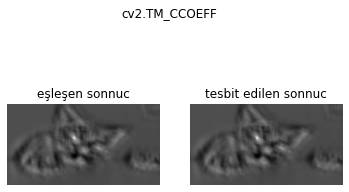

(222, 418)


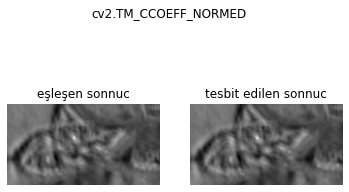

(222, 418)


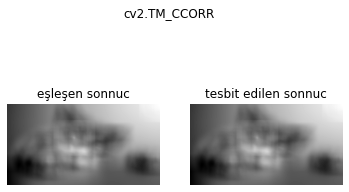

(222, 418)


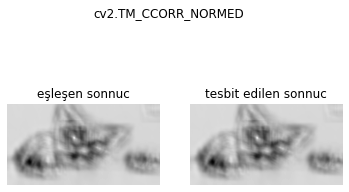

(222, 418)


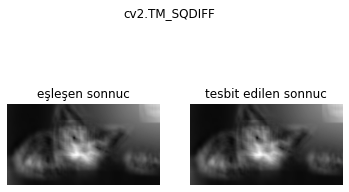

(222, 418)


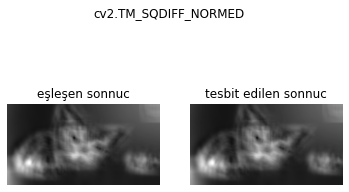

In [18]:
for m in methods:
    method = eval(m) # str -> meth
    resim = cv2.matchTemplate(img,template,method)
    print(resim.shape)
    
    # Eşleşen görüntüdeki lokasyon bazlı min max değerleri tutulur.
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(resim)
    
    if method in [cv2.TM_SQDIFF,cv2.TM_SQDIFF_NORMED]:
        matchLoc = min_loc
    else:
        matchLoc = max_loc
        
    bottom_right = (matchLoc[0]+w,matchLoc[1]+h)
    cv2.rectangle(img, matchLoc,bottom_right,255,2)
    
    plt.figure()
    plt.subplot(121),plt.imshow(resim,cmap="gray")
    plt.title("eşleşen sonnuc"),plt.axis("off")
    plt.subplot(122),plt.imshow(resim,cmap="gray")
    plt.title("tesbit edilen sonnuc"),plt.axis("off")
    plt.suptitle(m)
    plt.show()

# Özellik Eşleştirme

Ana Görüntü

(-0.5, 473.5, 354.5, -0.5)

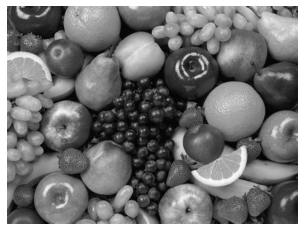

In [3]:
img = cv2.imread("3.jpg",0)
plt.figure()
plt.imshow(img,cmap="gray")
plt.axis("off")

Aranacak Görüntü

(-0.5, 473.5, 473.5, -0.5)

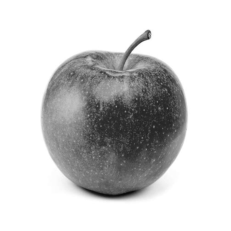

In [4]:
img2 = cv2.imread("4.jpg",0)
plt.figure()
plt.imshow(img2,cmap="gray")
plt.axis("off")

Köşe - Kenar gibi özellik tespiti

In [5]:
orb = cv2.ORB_create()
x, y = orb.detectAndCompute(img, None)
x2, y2 = orb.detectAndCompute(img2, None)

Eşleştirme

In [6]:
bf = cv2.BFMatcher(cv2.NORM_HAMMING)
matches = bf.match(y,y2)

Görselleştirme

(<matplotlib.image.AxesImage at 0x1f8c9d46c10>, (-0.5, 947.5, 473.5, -0.5))

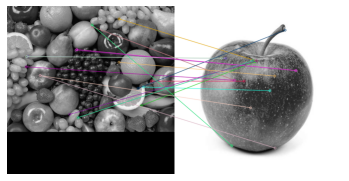

In [7]:
matches = sorted(matches, key = lambda x: x.distance)
plt.figure()
img_match = cv2.drawMatches(img,x,img2,x2,matches[:20],None,flags=2)
plt.imshow(img_match),plt.axis("off")

In [12]:
pip install opencv-contrib-python --user

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: numpy>=1.17.3 in c:\users\mehme\anaconda3\lib\site-packages (from opencv-contrib-python) (1.18.5)



(<matplotlib.image.AxesImage at 0x1f8c9f2b220>, (-0.5, 947.5, 473.5, -0.5))

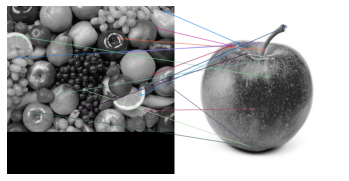

In [9]:
sift = cv2.xfeatures2d.SIFT_create()
bf = cv2.BFMatcher()
matches = bf.match(y,y2)
x, y = sift.detectAndCompute(img, None)
x2, y2 = sift.detectAndCompute(img2, None)
matches = bf.knnMatch(y,y2,k=2)

eslesme = []
for match1, match2 in matches:
    if match1.distance < 0.75*match2.distance:
        eslesme.append([match1])

plt.figure()
sift_match = cv2.drawMatchesKnn(img,x,img2,x2,eslesme,None,flags=2)        
plt.imshow(sift_match),plt.axis("off")

# Havza Algoritması

Bir görüntüdeki farklı nesneleri ayırmak için kullanılır.

(<Figure size 432x288 with 1 Axes>,
 (-0.5, 473.5, 189.5, -0.5))

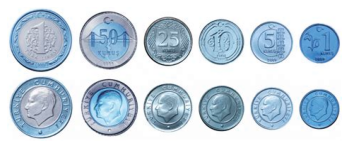

In [3]:
img = cv2.imread("5.jpg")
plt.figure(), plt.imshow(img), plt.axis("off")

Median Blurr ve Grayscale

(<Figure size 432x288 with 1 Axes>,
 (-0.5, 473.5, 189.5, -0.5))

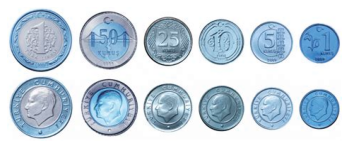

In [4]:
img_blurr = cv2.medianBlur(img,1)
plt.figure(), plt.imshow(img_blurr),plt.axis("off")

(<Figure size 432x288 with 1 Axes>,
 (-0.5, 473.5, 189.5, -0.5))

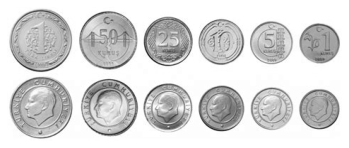

In [5]:
img_gray = cv2.cvtColor(img_blurr, cv2.COLOR_BGR2GRAY)
plt.figure(), plt.imshow(img_gray,cmap="gray"),plt.axis("off")

Binary Threshold

(<Figure size 432x288 with 1 Axes>,
 (-0.5, 473.5, 189.5, -0.5))

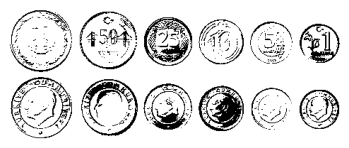

In [6]:
ret, img_thresh = cv2.threshold(img_gray,150,255,cv2.THRESH_BINARY)
plt.figure(), plt.imshow(img_thresh, cmap="gray"), plt.axis("off")

Contour Çizme

In [7]:
contours, hierarchy = cv2.findContours(img_thresh.copy(),
                                      cv2.RETR_CCOMP, 
                                      cv2.CHAIN_APPROX_SIMPLE)

(<Figure size 432x288 with 1 Axes>,
 (-0.5, 473.5, 189.5, -0.5))

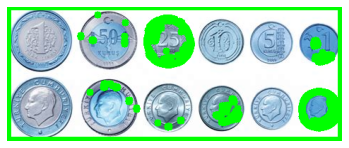

In [9]:
for i in range(len(contours)):
    if hierarchy[0][i][3] == -1:
        cv2.drawContours(img, contours,i,(0,255,0),10)
plt.figure(), plt.imshow(img), plt.axis("off")

Açılma

(<Figure size 432x288 with 1 Axes>,
 (-0.5, 473.5, 189.5, -0.5))

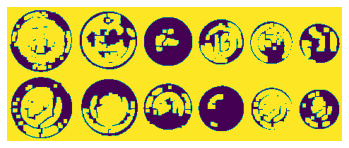

In [10]:
kernel = np.ones((3,3),np.uint8)
opening = cv2.morphologyEx(img_thresh, cv2.MORPH_OPEN, kernel, iterations =2)
plt.figure(), plt.imshow(opening), plt.axis("off")

Nesneler Arası Mesafe

(<Figure size 432x288 with 1 Axes>,
 (-0.5, 473.5, 189.5, -0.5))

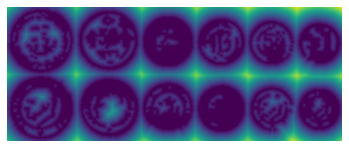

In [11]:
mesafe = cv2.distanceTransform(opening,cv2.DIST_L2,5)
plt.figure(), plt.imshow(mesafe), plt.axis("off")

(<Figure size 432x288 with 1 Axes>,
 (-0.5, 473.5, 189.5, -0.5))

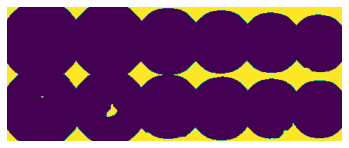

In [12]:
ret, kucult = cv2.threshold(mesafe, 0.4*np.max(mesafe),255,0)
plt.figure(), plt.imshow(kucult), plt.axis("off")

(<Figure size 432x288 with 1 Axes>,
 (-0.5, 473.5, 189.5, -0.5))

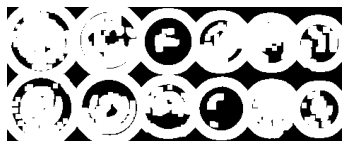

In [14]:
buyult = cv2.dilate(opening, kernel, iterations = 1)
kucult = np.uint8(kucult)
son = cv2.subtract(buyult,kucult)
plt.figure(), plt.imshow(son,cmap="gray"), plt.axis("off")

(<Figure size 432x288 with 1 Axes>,
 (-0.5, 473.5, 189.5, -0.5))

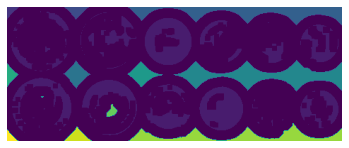

In [16]:
ret, marker = cv2.connectedComponents(kucult)
marker += 1
marker[son == 255] = 0
plt.figure(), plt.imshow(marker), plt.axis("off")

(<Figure size 432x288 with 1 Axes>,
 (-0.5, 473.5, 189.5, -0.5))

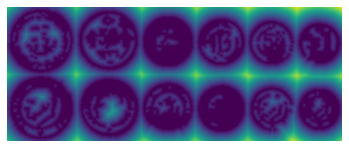

In [17]:
marker = cv2.watershed(img,marker)
plt.figure(), plt.imshow(mesafe), plt.axis("off")

In [18]:
contours, hierarchy = cv2.findContours(marker.copy(),
                                      cv2.RETR_CCOMP, 
                                      cv2.CHAIN_APPROX_SIMPLE)

(<Figure size 432x288 with 1 Axes>,
 (-0.5, 473.5, 189.5, -0.5))

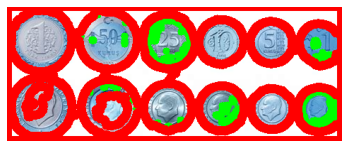

In [20]:
for i in range(len(contours)):
    if hierarchy[0][i][3] == -1:
        cv2.drawContours(img, contours,i,(255,0,0),10)
plt.figure(), plt.imshow(img), plt.axis("off")

# Yüz Tanıma Projesi

Resmi içe aktar

(<Figure size 432x288 with 1 Axes>,
 (-0.5, 473.5, 253.5, -0.5))

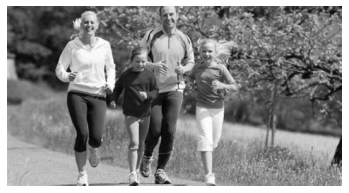

In [31]:
image = cv2.imread("6.jpg",0)
plt.figure(), plt.imshow(image, cmap="gray"), plt.axis("off")

Sınıflandırıcı

In [32]:
yuz_cascade = cv2.CascadeClassifier("haarcascade_frontalface_default.xml")

In [37]:
yuz_tesbit = yuz_cascade.detectMultiScale(image, minNeighbors=2)

rectangle(image, başlangıç_noktası, bitiş_noktası, color, kalınlık)

(<Figure size 432x288 with 1 Axes>,
 (-0.5, 473.5, 253.5, -0.5))

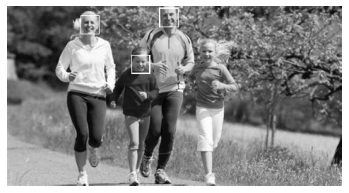

In [38]:
for (x,y,w,h) in yuz_tesbit:
    cv2.rectangle(image, (x,y),(x+w,y+h),(255,255,255),0)
plt.figure(), plt.imshow(image, cmap="gray"), plt.axis("off")